In [4]:
import re
import os
from PyPDF2 import PdfFileReader
from google_trans_new import google_translator
from string import digits
# Step1: Extract text data from the government report. Clean and save it for later analysis
CHARACTERS = {
    "ç": "Á",
    "⁄": "á",
    "…": "É",
    "”": "é",
    "ê": "Í",
    "™": 'í',
    "î": "Ó",
    "Š": "ó",
    "ı": "ö",
    "ò": "Ú",
    "œ": "ú",
    "Œ": "ñ",
    "Ô": "‘",
    "Õ": "’",
    "¥": "• ",
    "Ñ": "—",
    "¨": "®",
    "«": "´",
    "Ò": "“"
}

def extract_data(data_path, page_start, page_end):
    # Extrct text data from starting page to ending page and translate the data into English.
    # The extracted data will be saved as a .txt file
    saved_file = 'cleaned_text.txt'
    if os.path.exists(saved_file):
        os.remove(saved_file)
    file = open(data_path, 'rb')
    reader = PdfFileReader(file)
    full_text = ""
    for i in range(page_start, page_end):
        print("processing page {}".format(i))
        page_text = reader.getPage(i).extractText()
        # remove the page number and \n
        page_text = page_text.strip().lstrip(digits).replace('\n', '')
        
        # manually clear the special characters
        for special_cha, replacement in CHARACTERS.items():
            page_text = page_text.replace(special_cha, replacement)
    
        # After extract the text, translate it into english
        translator = google_translator()
        translation = translator.translate(page_text, lang_tgt='en')
        full_text += translation
    
        
    with open(saved_file, 'w+') as temp_file:
        temp_file.write(full_text)
        
# only retrieve a part of the government report (page 14 to page 100)        
extract_data('data/informe.pdf', 14, 101)
        



processing page 14
processing page 15
processing page 16
processing page 17
processing page 18
processing page 19
processing page 20
processing page 21
processing page 22
processing page 23
processing page 24
processing page 25
processing page 26
processing page 27
processing page 28
processing page 29
processing page 30
processing page 31
processing page 32
processing page 33
processing page 34
processing page 35
processing page 36
processing page 37
processing page 38
processing page 39
processing page 40
processing page 41
processing page 42
processing page 43
processing page 44
processing page 45
processing page 46
processing page 47
processing page 48
processing page 49
processing page 50
processing page 51
processing page 52
processing page 53
processing page 54
processing page 55
processing page 56
processing page 57
processing page 58
processing page 59
processing page 60
processing page 61
processing page 62
processing page 63
processing page 64
processing page 65
processing p

In [43]:
import spacy
import csv
# Step 2. Do language processing fot the text dataset, and store the processed data in the form of .csv file.
# Basically this step is doing tokenization and lemmatization
def get_tokens(doc):
    # tokenize the data, filter puntuation, stop words and only keep alphabatic words
    saved_file = "tokens.csv"
    data = [['text', 'text_lower', 'lemma_lower', 'part_of_speech']]
    for token in doc:
        if not token.is_alpha or token.is_stop:
            continue
        data.append([token.text, token.lower_, token.lemma_.lower(), token.pos_])
    with open(saved_file, 'w+') as token_file:
        csv.writer(token_file).writerows(data)
            
def get_entities(doc):
    # get the entities and save them in the form of .csv file
    # filter number and date
    saved_file = 'entities.csv'
    data = [['text', 'text_lower', 'label']]
    for entity in doc.ents:
        if entity.label_ in ['DATE', "CARDINAL", "PERCENT", "ORDINAL", 'TIME']:
            continue
        data.append([entity.text, entity.text.lower(), entity.label_])
    with open(saved_file, 'w+') as entity_file:
        csv.writer(entity_file).writerows(data)
        
# nlp = spacy.load("es_core_news_md")
nlp = spacy.load("en_core_web_sm")
doc = nlp(open('cleaned_text.txt', 'r').read())
# doc = nlp('I am Alex. I am studying in Cornell University')
get_tokens(doc)
get_entities(doc)

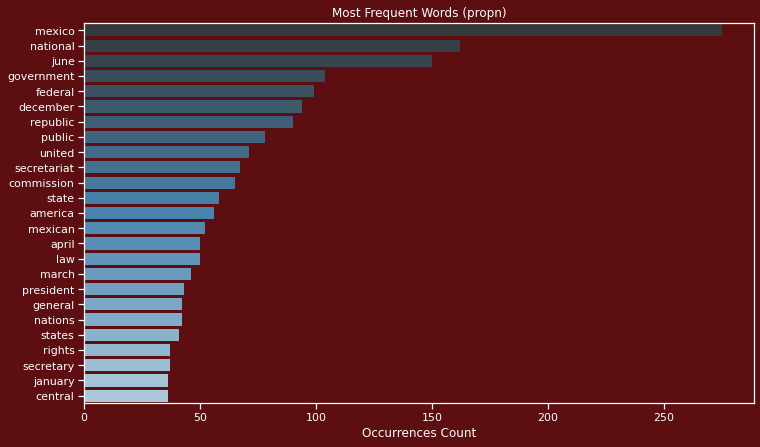

In [42]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Step 3. Do some statistics on the cleaned dataset and generate plots
sns.set(style="ticks",
        rc={
            "figure.figsize": [12, 7],
            "text.color": "white",
            "axes.labelcolor": "white",
            "axes.edgecolor": "white",
            "xtick.color": "white",
            "ytick.color": "white",
            "axes.facecolor": "#5C0E10",
            "figure.facecolor": "#5C0E10"}
        )

def plot_most_used_words(top=20, pos=None):
    # Get the most used words in the dataset, by default the top 20.
    # pos: None, NONE, VERB, PROPN
    tokens_df = pd.read_csv("tokens.csv")
    if pos not in ['NOUN', 'VERB', 'PROPN']:
        pos = None
    if pos is None:
        words = tokens_df['lemma_lower'].value_counts()[:top]
        title = "Most Frequent Words"
    else:
        words = tokens_df[tokens_df['part_of_speech'] == pos]['lemma_lower'].value_counts()[:top]
        title = "Most Frequent Words ({})".format(pos.lower())
    sns.barplot(x=words.values, y=words.index, palette="Blues_d", linewidth=0)
    plt.xlabel("Occurrences Count")
    plt.title(title)
    plt.savefig("words_counts.png", facecolor="#5C0E10")


plot_most_used_words(top=25, pos='PROPN')

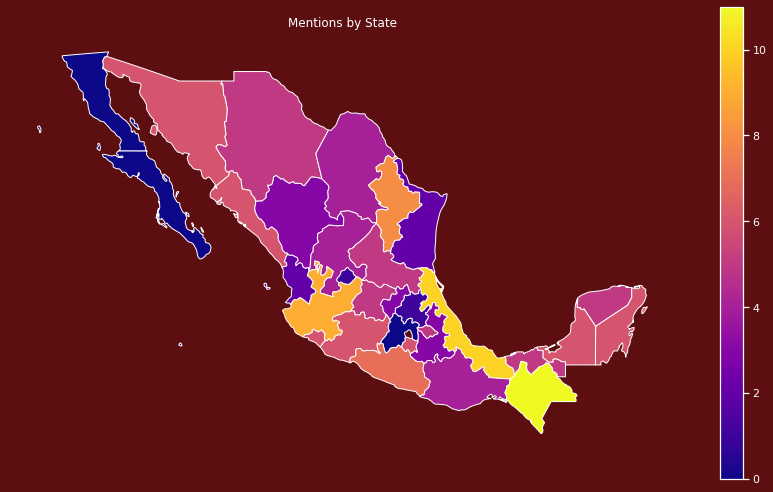

In [44]:
# ACCENT_MARKS = ["á", "Á", "é", "É", "í", "Í", "ó", "Ó", "ú", "Ú"]
# FRIENDLY_MARKS = ["a", "A", "e", "E", "i", "I", "o", "O", "u", "U"]

STATES = [
    "Aguascalientes",
    "Baja California",
    "Baja California Sur",
    "Campeche",
    "Chiapas",
    "Chihuahua",
    "Ciudad de México",
    "Coahuila",
    "Colima",
    "Durango",
    "Estado de México",
    "Guanajuato",
    "Guerrero",
    "Hidalgo",
    "Jalisco",
    "Michoacán",
    "Morelos",
    "Nayarit",
    "Nuevo León",
    "Oaxaca",
    "Puebla",
    "Querétaro",
    "Quintana Roo",
    "San Luis Potosí",
    "Sinaloa",
    "Sonora",
    "Tabasco",
    "Tamaulipas",
    "Tlaxcala",
    "Veracruz",
    "Yucatán",
    "Zacatecas"
]
# correspond the names of states with the names in the map dataframe
CLEAN_STATES_DICT = {"Ciudad de México": "DistroFederal",
                    "Estado de México": "Mexico",
                    "Michoacán": "Michoacan",
                    "Nuevo León": "Nuevo Leon",
                    "Querétaro": "Queretaro",
                    "San Luis Potosí": "San Luis Potosi",
                    "Yucatán": "Yucatan"}
def plot_map():
    # load the map
    mexico_df = geopandas.read_file("data/mexstates")
    entity_df = pd.read_csv("entities.csv")
    for state in STATES:
        clean_name = state
        if state in CLEAN_STATES_DICT:
            clean_name = CLEAN_STATES_DICT[state]
        # count how many times a given state appears in the entity dataset, and insert the value to the mexico_df
        times = len(entity_df[entity_df['text_lower'] == state.lower()])
        mexico_df.loc[mexico_df['ADMIN_NAME'] == clean_name, "count"] = times
    
    mexico_df.plot(column="count", cmap="plasma", legend=True)
    plt.title("Mentions by State")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("map.png", facecolor="#5C0E10")
    
plot_map()
        
    